In [96]:
import numpy as np
import matplotlib.pyplot as plt
import hiive.mdptoolbox
np.random.seed(0)
import hiive.mdptoolbox.example
from numpy import cumsum

#getting the transition and reward matrix
P, R = hiive.mdptoolbox.example.forest(S=20, r1=4, r2=2, p=0.1)
print(P,R)

#policy iteration
vi = hiive.mdptoolbox.mdp.ValueIteration(P, R, 0.9)
vi.run()
vi.run_stats
print("executed")

[[[0.1 0.9 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0. ]
  [0.1 0.  0.9 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0. ]
  [0.1 0.  0.  0.9 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0. ]
  [0.1 0.  0.  0.  0.9 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0. ]
  [0.1 0.  0.  0.  0.  0.9 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0. ]
  [0.1 0.  0.  0.  0.  0.  0.9 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0. ]
  [0.1 0.  0.  0.  0.  0.  0.  0.9 0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0. ]
  [0.1 0.  0.  0.  0.  0.  0.  0.  0.9 0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0. ]
  [0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.9 0.  0.  0.  0.  0.  0.  0.
   0.  0.  0. ]
  [0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.9 0.  0.  0.  0.  0.  0.
   0.  0.  0. ]
  [0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.9 0.  0.  0.  0.  0.
   0.  0.  0. ]
  [0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.9

In [97]:
vi.policy

(0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

In [98]:
vi.V

(4.3972734135838945,
 4.949908618890849,
 4.949908618890849,
 4.949908618890849,
 4.949908618890849,
 4.949908618890849,
 4.949908618890849,
 4.949908618890849,
 4.949908618890849,
 4.949908618890849,
 5.196930571860687,
 5.938138647401423,
 6.853210345599862,
 7.982928491523864,
 9.377642251923865,
 11.099511091923867,
 13.225275091923866,
 15.849675091923864,
 19.089675091923866,
 23.089675091923866)

In [99]:
vi.iter

39

In [100]:
vi.time

0.0020003318786621094

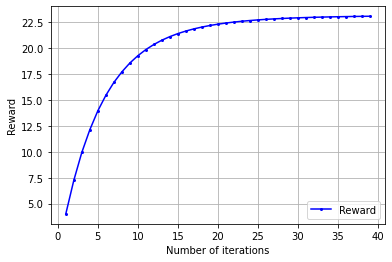

In [101]:
time_vector=[]
reward_vector=[]
iteration_vector=[]
for k in range (vi.iter):
    time_vector.append(vi.run_stats[k].get('Time'))
    reward_vector.append(vi.run_stats[k].get('Reward'))
    iteration_vector.append(vi.run_stats[k].get('Iteration'))

plt.plot(iteration_vector, reward_vector, marker='o', markersize=2,color='blue', label='Reward')
plt.xlabel('Number of iterations')
plt.ylabel('Reward')
plt.legend(loc='lower right')
plt.grid()
plt.show()

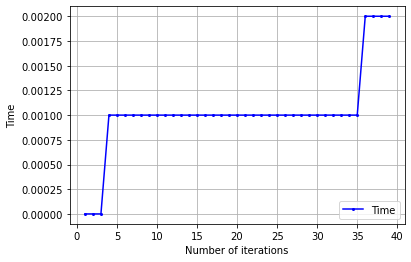

In [102]:
plt.plot(iteration_vector, time_vector, marker='o', markersize=2,color='blue', label='Time')
plt.xlabel('Number of iterations')
plt.ylabel('Time')
plt.legend(loc='lower right')
plt.grid()
plt.show()

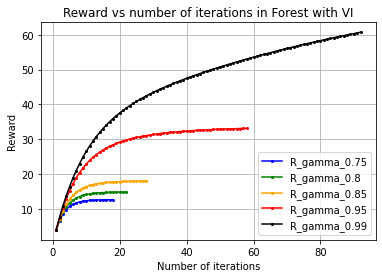

In [103]:
#evolution with a parameter gamma tuning: 
gamma_list=[0.75,0.80,0.85,0.95,0.99]
color_list=['blue','green','orange','red','black']
for g in range (0,len(gamma_list)):
    vi = hiive.mdptoolbox.mdp.ValueIteration(P, R, gamma_list[g])
    vi.run()
    reward_vector=[]
    iteration_vector=[]
    for k in range (vi.iter):
        reward_vector.append(vi.run_stats[k].get('Reward'))
        iteration_vector.append(vi.run_stats[k].get('Iteration'))
    plt.plot(iteration_vector, reward_vector, marker='o', markersize=2,color=color_list[g], label='R_gamma_'+str(gamma_list[g]))
    plt.xlabel('Number of iterations')
    plt.ylabel('Reward')
    plt.title('Reward vs number of iterations in Forest with VI')
    plt.legend(loc='lower right')
    plt.grid()
plt.show()

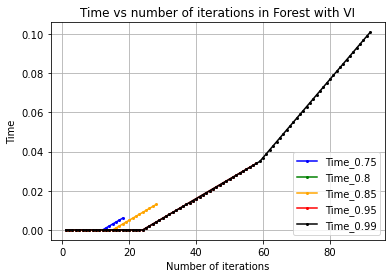

In [104]:
#evolution with a parameter gamma tuning: 
gamma_list=[0.75,0.80,0.85,0.95,0.99]
color_list=['blue','green','orange','red','black']
for g in range (0,len(gamma_list)):
    vi = hiive.mdptoolbox.mdp.ValueIteration(P, R, gamma_list[g])
    vi.run()
    time_vector=[]
    iteration_vector=[]
    for k in range (vi.iter):
        time_vector.append(vi.run_stats[k].get('Time'))
        iteration_vector.append(vi.run_stats[k].get('Iteration'))
    plt.plot(iteration_vector, cumsum(time_vector), marker='o', markersize=2,color=color_list[g], label='Time_'+str(gamma_list[g]))
    plt.xlabel('Number of iterations')
    plt.ylabel('Time')
    plt.title('Time vs number of iterations in Forest with VI')
    plt.legend(loc='lower right')
    plt.grid()
plt.show()

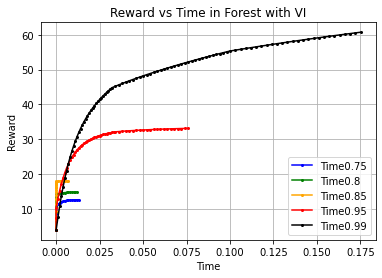

In [105]:
#evolution with a parameter gamma tuning: 
gamma_list=[0.75,0.80,0.85,0.95,0.99]
color_list=['blue','green','orange','red','black']
for g in range (0,len(gamma_list)):
    vi = hiive.mdptoolbox.mdp.ValueIteration(P, R, gamma_list[g])
    vi.run()
    time_vector=[]
    reward_vector=[]
    for k in range (vi.iter):
        time_vector.append(vi.run_stats[k].get('Time'))
        reward_vector.append(vi.run_stats[k].get('Reward'))
    plt.plot(cumsum(time_vector), reward_vector, marker='o', markersize=2,color=color_list[g], label='Time'+str(gamma_list[g]))
    plt.title('Reward vs Time in Forest with VI')
    plt.xlabel('Time')
    plt.ylabel('Reward')
    plt.legend(loc='lower right')
    plt.grid()
plt.show()